In [40]:
!pip install pandas
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [41]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split # This line was missing and imports train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
# %%
base_treino = pd.read_csv("base_princ_modificado.csv")
# %%
base_treino.head()
# %%
base_treino.describe()
# %%
media_idade = round(base_treino['Idade'].mean())
print(media_idade)
# %%
X_treino, X_teste, y_treino, y_teste = train_test_split(base_treino.drop(columns=['Situação de trabalho']), base_treino['Situação de trabalho'], test_size=0.25, random_state=42)

32


In [42]:
print(base_treino['Regiao onde mora'].unique())

[2 1 3 4 0]


In [43]:
base_treino.loc[base_treino['Regiao onde mora'] == 'Centro-oeste', 'Regiao onde mora'] = 4

In [44]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=4)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4)

In [45]:
previsoes = modelo.predict(X_teste)
previsoes

array(['Empregado(a)', 'Empregado(a)', 'Empregado(a)', ...,
       'Empregado(a)', 'Empregado(a)', 'Empregado(a)'], dtype=object)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore
accuracy_score(y_teste,previsoes)

0.8938329430132709

In [47]:
from yellowbrick.classifier import ConfusionMatrix # type: ignore
confusion_matrix(y_teste, previsoes)

array([[   5,  126],
       [  10, 1140]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8938329430132709

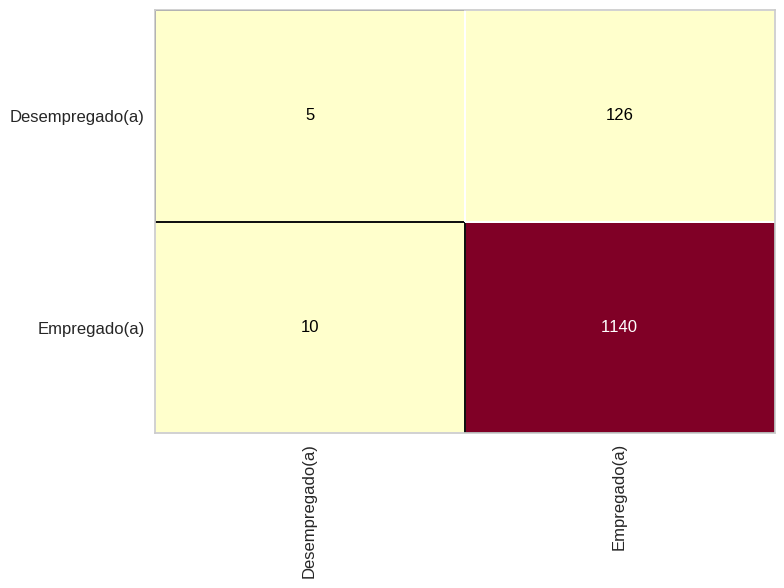

In [48]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [49]:
print(classification_report(y_teste, previsoes))

                 precision    recall  f1-score   support

Desempregado(a)       0.33      0.04      0.07       131
   Empregado(a)       0.90      0.99      0.94      1150

       accuracy                           0.89      1281
      macro avg       0.62      0.51      0.51      1281
   weighted avg       0.84      0.89      0.85      1281



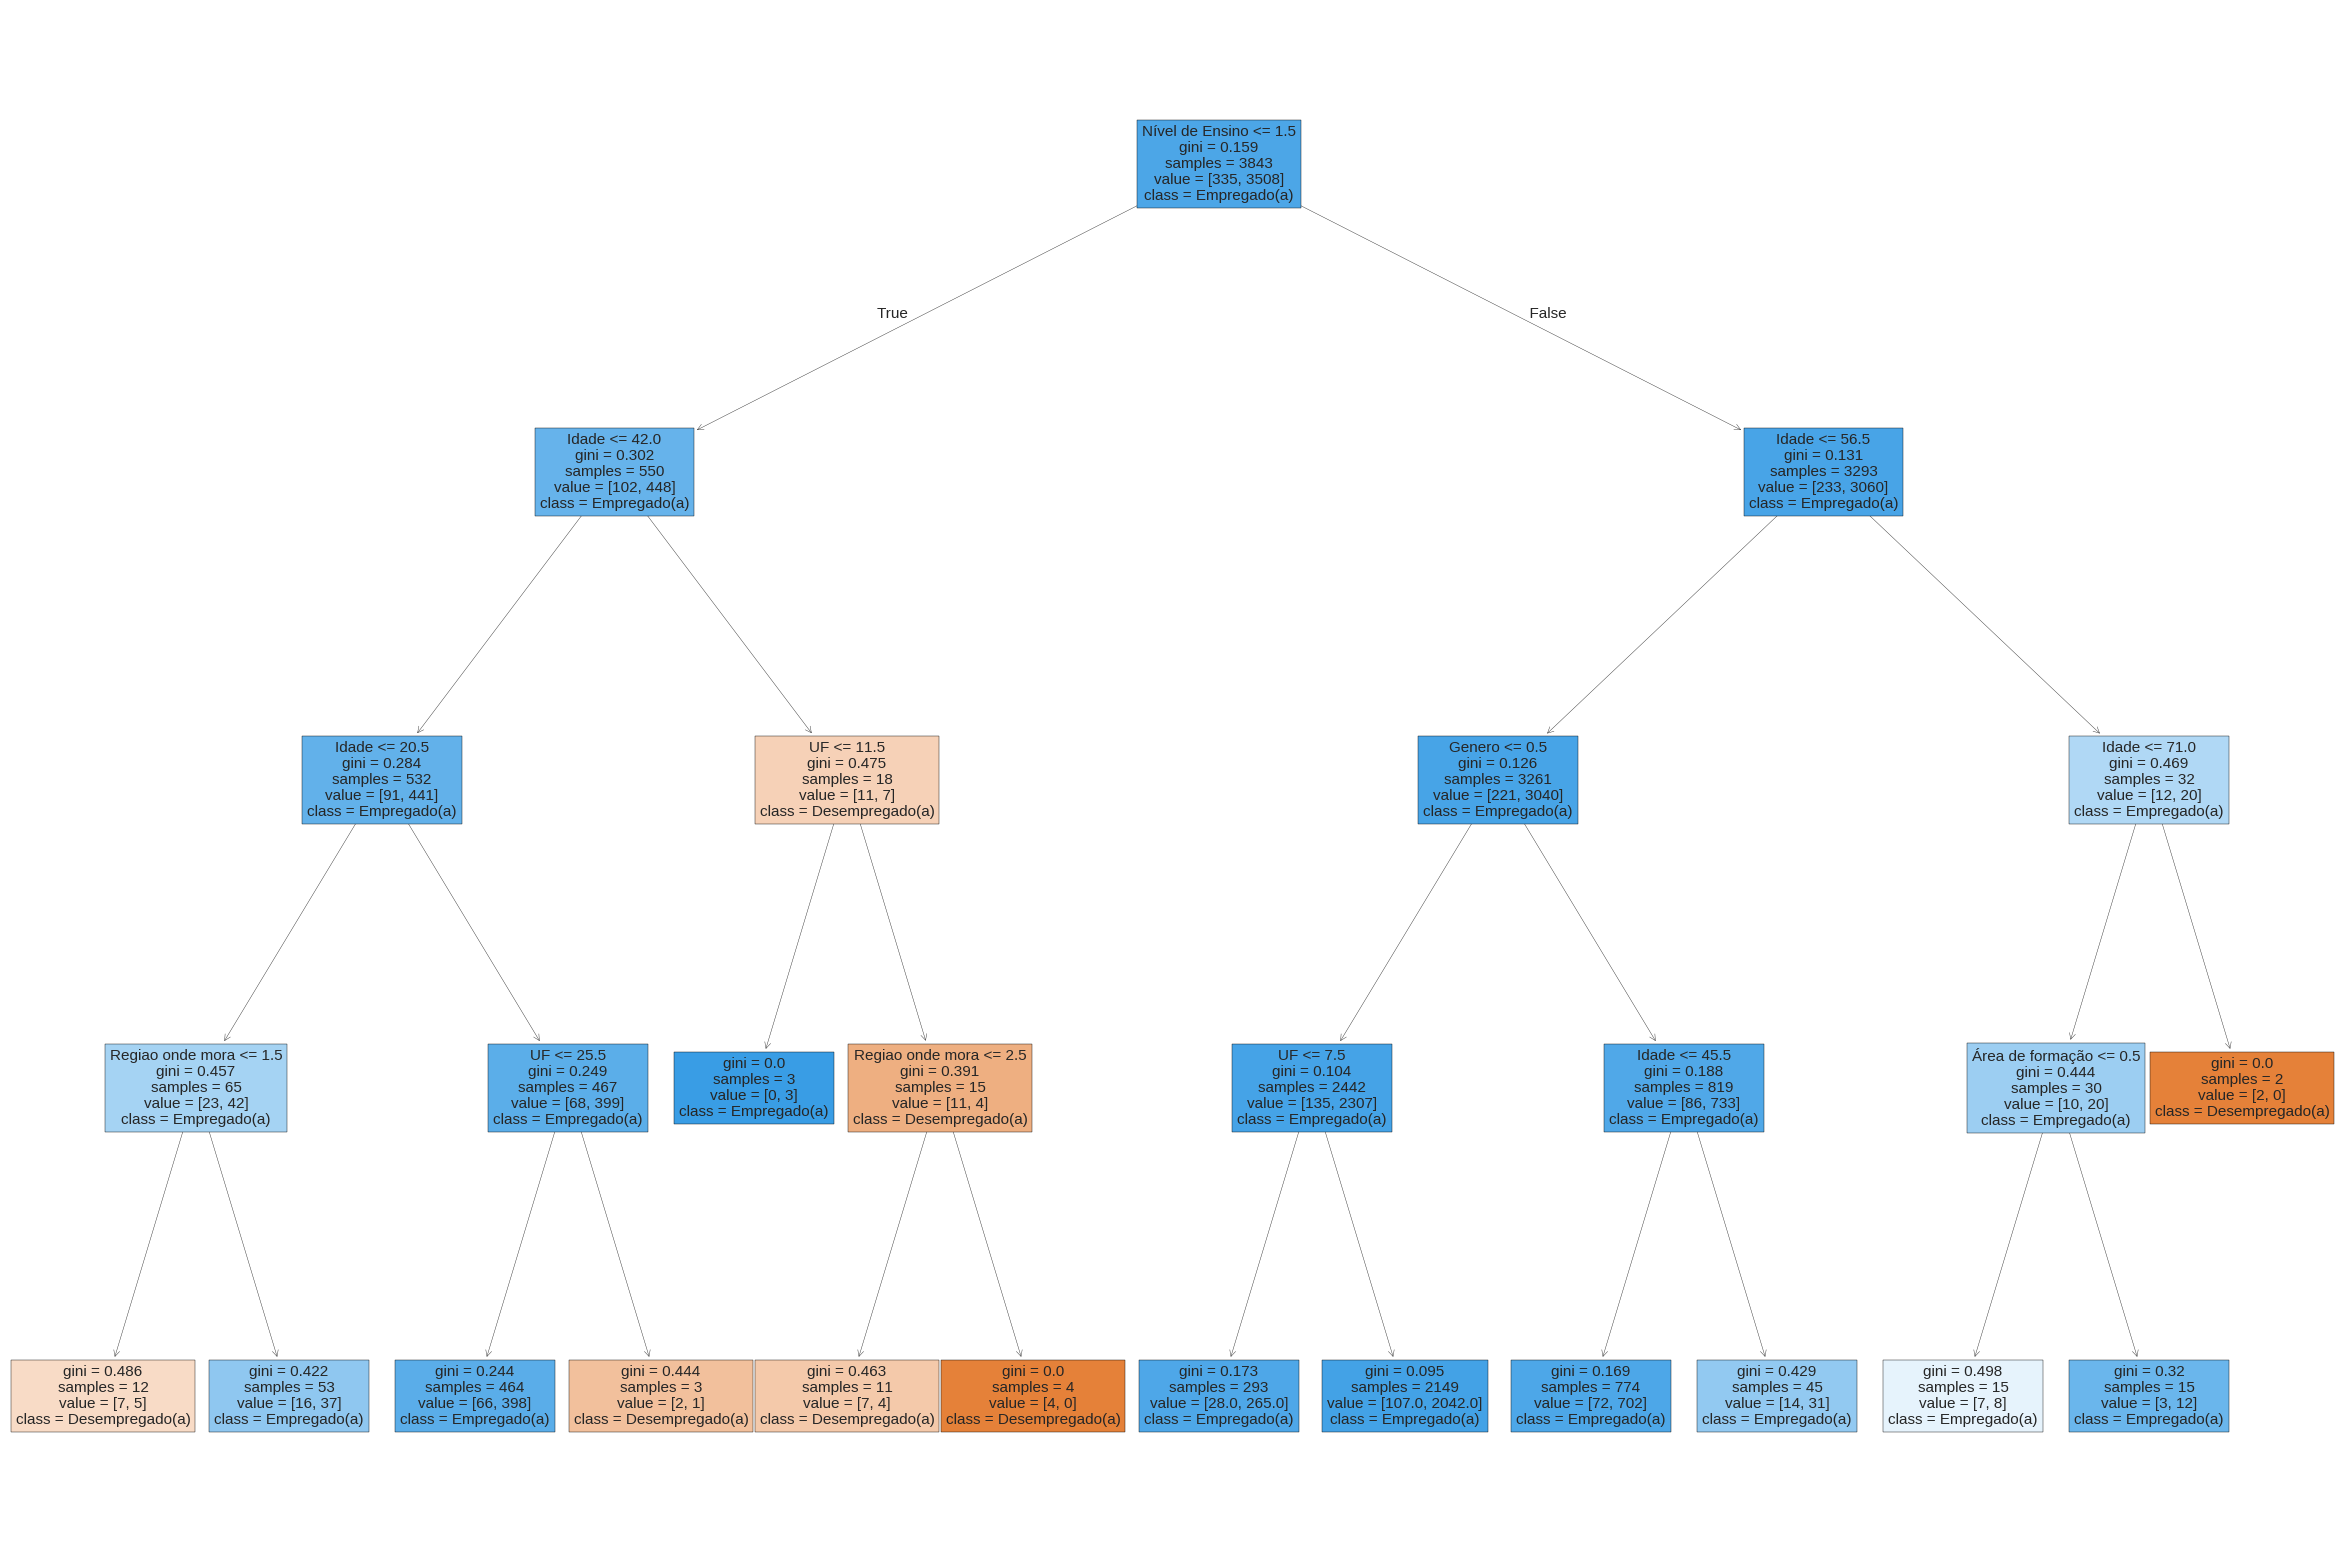

In [51]:
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(30,20))
tree.plot_tree(modelo, feature_names=previsores, class_names = ['Desempregado(a)', 'Empregado(a)'], filled=True);
plt.savefig("modelo_arvore.png", dpi=600)